In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.integrate import quad
import multiprocessing as mp
import gc

In [9]:
m=pd.read_csv('matchlist.csv')
m=m[m.matchednum!=0]

In [17]:
delta_ra=(m.HSCra-m.S82ra1)*3600
delta_dec=(m.HSCdec-m.S82dec1)*3600

In [18]:
np.mean(delta_ra)

0.049442083206839495

In [19]:
np.mean(delta_dec)

-0.07320766737295487

In [31]:
np.mean(m.S82sep1)

0.14218296845928435

In [32]:
np.mean(Y)

0.12223269619584916

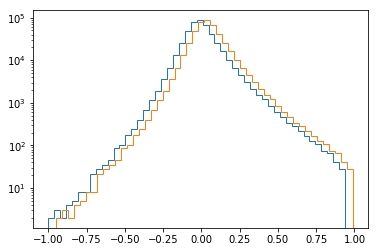

In [43]:
plt.hist(delta_ra-np.mean(delta_ra),bins=50,histtype='step')
plt.hist(delta_ra,bins=50,histtype='step')
plt.yscale('log')

Text(0.5, 0, '$\\theta$/arcsec')

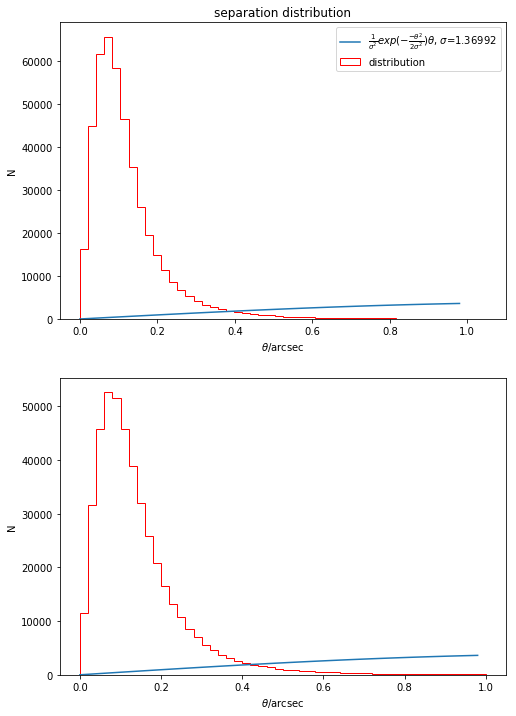

In [35]:
n=50
Y=np.sqrt((delta_ra-np.mean(delta_ra))**2+(delta_dec-np.mean(delta_dec))**2)
x=np.array(range(n+1))/n
y=[]
for i in range(n):
    temp=len(Y[(Y>=x[i])&(Y<x[i+1])])
    y.append(temp)
y=np.array(y)
y=y/sum(y)*n
x=np.delete(x,-1)


def func(r,sigma):
    return 1/(sigma**2)*np.exp(-r**2/2/sigma**2)*r

popt,pcov=curve_fit(func,x,y)

plt.figure(figsize=(8,12))
plt.subplot(211)
plt.hist(Y,bins=n,color='red',histtype='step',label='distribution')
plt.plot(x,func(x,popt[0])/n*len(m),label=r'$\frac{1}{\sigma^2}exp(-\frac{-\theta^2}{2\sigma^2})\theta$, $\sigma$=%1.5f'%(popt[0]))
plt.ylabel('N')
plt.xlabel(r'$\theta$/arcsec')
plt.title('separation distribution')
plt.legend()
plt.subplot(212)
plt.hist(m.S82sep1,bins=n,color='red',histtype='step',label='distribution')
plt.plot(x,func(x,popt[0])/n*len(m),label=r'$\frac{1}{\sigma^2}exp[-\frac{-\theta^2}{2\sigma^2}]\theta$, $\sigma$=%1.5f'%(popt[0]))
plt.ylabel('N')
plt.xlabel(r'$\theta$/arcsec')




In [2]:
n=100

def func(theta,sigma):
    y=1/(sigma**2)*np.exp(-(theta)**2/(2*sigma**2))*theta
    return y

popt=[]
pcov=[]
for i in range(6):
    Y=mm[i].S82sep1
    x=np.array(range(n+1))/n
    y=[]
    for j in range(n):
        temp=len(Y[(Y>=x[j])&(Y<x[j+1])])
        y.append(temp)
    y=np.array(y)
    y=y/sum(y)*n
    x=np.delete(x,-1)
    t,v=curve_fit(func,x,y)
    popt.append(t)
    pcov.append(v)

NameError: name 'mm' is not defined

NameError: name 'mm' is not defined

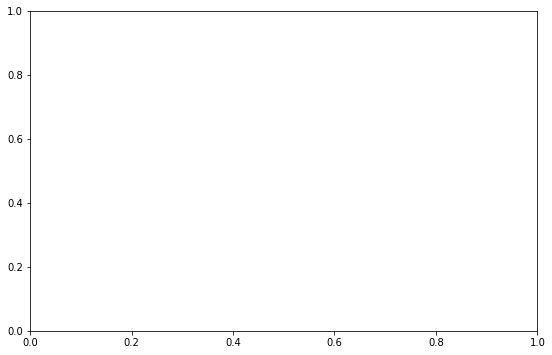

In [3]:
plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.hist(mm[i].HSCsep1,bins=n,histtype='step',label=r'i_mag=%.0f~%.0f, total number=%.0f'%(18+i,19+i,len(mm[i])))
    plt.plot(x,func(x,popt[i])/n*len(mm[i]),label=r'$\frac{1}{\sigma^2}exp(-\frac{-\theta^2}{2\sigma^2})\theta]$, $\sigma$=%1.5f'%(popt[i]))
    plt.ylabel('N')
    plt.xlabel(r'$\theta$/arcsec')
    plt.legend()

In [10]:
n=100
Y=m.HSCsep
x=np.array(range(n+1))/n
y=[]
for i in range(n):
    temp=len(Y[(Y>=x[i])&(Y<x[i+1])])
    y.append(temp)
y=np.array(y)
y=y/sum(y)*n
x=np.delete(x,-1)


def func(r,sigma):
    return 1/(sigma**2)*np.exp(-r**2/2/sigma**2)*r

popt,pcov=curve_fit(func,x,y)

plt.figure(figsize=(8,12))
plt.subplot(211)
plt.hist(m.HSCsep1,bins=n,color='red',histtype='step',label='distribution')
plt.plot(x,func(x,popt[0])/n*len(m),label=r'$\frac{1}{\sigma^2}exp(-\frac{-\theta^2}{2\sigma^2})\theta$, $\sigma$=%1.5f'%(popt[0]))
plt.ylabel('N')
plt.xlabel(r'$\theta$/arcsec')
plt.title('separation distribution')
plt.legend()
plt.subplot(212)
plt.hist(m.HSCsep1,bins=n,color='red',histtype='step',label='distribution')
plt.plot(x,func(x,popt[0])/n*len(m),label=r'$\frac{1}{\sigma^2}exp[-\frac{-\theta^2}{2\sigma^2}]\theta$, $\sigma$=%1.5f'%(popt[0]))
plt.ylabel('N')
plt.yscale('log')
plt.axis([-0.01,1.01,1,1e5])
plt.xlabel(r'$\theta$/arcsec')



AttributeError: 'DataFrame' object has no attribute 'HSCsep1'

In [5]:
popt,pcov=curve_fit(func,x,y)

plt.figure(figsize=(8,12))
plt.subplot(211)
plt.hist(m.S82sep1,bins=n,color='red',histtype='step',label='distribution')
plt.plot(x,func(x,popt)/n*len(m),label=r'$\frac{1}{\sigma^2}exp(-\frac{-\theta^2}{2\sigma^2})\theta]$, $\sigma$=%1.5f'%(popt))
plt.ylabel('N')
plt.xlabel(r'$\theta$/arcsec')
plt.title('separation distribution')
plt.legend()
plt.subplot(212)
plt.hist(m.S82sep1,bins=n,color='red',histtype='step',label='distribution')
plt.plot(x,func(x,popt)/n*len(m),label=r'$\frac{1}{\sigma^2}exp[-\frac{-\theta^2}{2\sigma^2}]\theta]$, $\sigma$=%1.5f'%(popt))
plt.ylabel('N')
plt.yscale('log')
plt.xlabel(r'$\theta$/arcsec')

NameError: name 'x' is not defined

In [47]:
m[m.matchednum==1]

,HSCindex,HSCra,HSCdec,matchednum,HSCg,HSCgerr,HSCgpsf,HSCgpsferr,HSCi,HSCierr,...,S82ipsferr2,S82zpsferr2,S82g2,S82r2,S82i2,S82z2,S82gerr2,S82rerr2,S82ierr2,S82zerr2
0,0.0,0.683341,-1.237796,1.0,25.020439,0.178818,25.015406,0.168717,23.709082,0.038271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,0.737652,-1.256681,1.0,20.117420,0.002994,20.111904,0.002961,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,0.721098,-1.253635,1.0,22.910667,0.026239,22.891300,0.024522,19.588703,0.001527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,0.706565,-1.244124,1.0,NaN,NaN,21.306517,0.006895,20.609005,0.002977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,0.707686,-1.235716,1.0,20.315216,0.003458,20.305750,0.003257,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,0.681946,-1.236123,1.0,22.679911,0.020238,22.683495,0.019539,20.703981,0.005345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,0.738998,-1.234393,1.0,20.746340,0.004276,20.748585,0.004007,18.474920,0.000781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10.0,0.674030,-1.232771,1.0,22.104805,0.011110,22.105711,0.010696,21.422022,0.008298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11.0,0.729432,-1.230399,1.0,25.563652,0.269895,25.446568,0.232399,23.131651,0.022440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12.0,0.710369,-1.225252,1.0,23.309202,0.038094,23.281799,0.035150,22.751562,0.017011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
m

,HSCindex,HSCra,HSCdec,matchednum,HSCg,HSCgerr,HSCgpsf,HSCgpsferr,HSCi,HSCierr,...,S82ipsferr2,S82zpsferr2,S82g2,S82r2,S82i2,S82z2,S82gerr2,S82rerr2,S82ierr2,S82zerr2
0,0.0,0.683341,-1.237796,1.0,25.020439,0.178818,25.015406,0.168717,23.709082,0.038271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,0.737652,-1.256681,1.0,20.117420,0.002994,20.111904,0.002961,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,0.721098,-1.253635,1.0,22.910667,0.026239,22.891300,0.024522,19.588703,0.001527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,0.706565,-1.244124,1.0,NaN,NaN,21.306517,0.006895,20.609005,0.002977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,0.707686,-1.235716,1.0,20.315216,0.003458,20.305750,0.003257,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,0.681946,-1.236123,1.0,22.679911,0.020238,22.683495,0.019539,20.703981,0.005345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,0.738998,-1.234393,1.0,20.746340,0.004276,20.748585,0.004007,18.474920,0.000781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10.0,0.674030,-1.232771,1.0,22.104805,0.011110,22.105711,0.010696,21.422022,0.008298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11.0,0.729432,-1.230399,1.0,25.563652,0.269895,25.446568,0.232399,23.131651,0.022440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12.0,0.710369,-1.225252,1.0,23.309202,0.038094,23.281799,0.035150,22.751562,0.017011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
